# Data Processing
## Hierarchical indexing
## Multiple index

In [3]:
import pandas as pd

data = pd.Series([10, 20, 30, 40, 15, 25, 35, 25], 
                    index=[['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], 
                    ['obj1', 'obj2', 'obj3', 'obj4', 'obj1', 'obj2', 'obj3', 'obj4']])

data

a  obj1    10
   obj2    20
   obj3    30
   obj4    40
b  obj1    15
   obj2    25
   obj3    35
   obj4    25
dtype: int64

## Partial indexing

In [4]:
data['b']

obj1    15
obj2    25
obj3    35
obj4    25
dtype: int64

In [5]:
data[:, 'obj2']

a    20
b    25
dtype: int64

## Unstack the data
* default = 1

In [6]:
data.unstack(0)

,a,b
obj1,10,15
obj2,20,25
obj3,30,35
obj4,40,25


In [8]:
data.unstack(1), data.unstack()

(   obj1  obj2  obj3  obj4
 a    10    20    30    40
 b    15    25    35    25,
    obj1  obj2  obj3  obj4
 a    10    20    30    40
 b    15    25    35    25)

## Column indexing

In [9]:
import numpy as np
df = pd.DataFrame(np.arange(12).reshape(4, 3),
                    index=[['a', 'a', 'b', 'b'], ['one', 'two', 'three', 'four']],
                    columns=[['num1', 'num2', 'num3'], ['red', 'green', 'red']])
df

num1  num2 num3
         red green  red
a one      0     1    2
  two      3     4    5
b three    6     7    8
  four     9    10   11

In [13]:
df.index

MultiIndex([('a',   'one'),
            ('a',   'two'),
            ('b', 'three'),
            ('b',  'four')],
           )

In [11]:
df.columns 

MultiIndex([('num1',   'red'),
            ('num2', 'green'),
            ('num3',   'red')],
           )

In [14]:
# indexe, column naming
df.index.names = ['key1', 'key2']
df.columns.names = ['n', 'color']
df

n          num1  num2 num3
color       red green  red
key1 key2                 
a    one      0     1    2
     two      3     4    5
b    three    6     7    8
     four     9    10   11

In [15]:
df['num1']

color       red
key1 key2      
a    one      0
     two      3
b    three    6
     four     9

In [30]:
df.loc['a', :], df.loc[:, 'num1']

(n     num1  num2 num3
 color  red green  red
 key2                 
 one      0     1    2
 two      3     4    5,
 color       red
 key1 key2      
 a    one      0
      two      3
 b    three    6
      four     9)

In [31]:
df.iloc[1, :], df.iloc[1, 2]

(n     color
 num1  red      3
 num2  green    4
 num3  red      5
 Name: (a, two), dtype: int32,
 5)

## Swap and sort level

In [32]:
df.swaplevel('key1', 'key2')

,n,num1,num2,num3
,color,red,green,red
key2,key1,,,
one,a,0,1,2
two,a,3,4,5
three,b,6,7,8
four,b,9,10,11


In [33]:
df.sort_index(level='key2')

,n,num1,num2,num3
,color,red,green,red
key1,key2,,,
b,four,9,10,11
a,one,0,1,2
b,three,6,7,8
a,two,3,4,5


## Summary statistics by level

In [34]:
df.sum(level='key1')

C:\Users\CHANGH~1\AppData\Local\Temp/ipykernel_2780/2792465638.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df.sum(level='key1')


n,num1,num2,num3
color,red,green,red
key1,,,
a,3,5,7
b,15,17,19


In [39]:
df.sum(level='color', axis=1)

C:\Users\CHANGH~1\AppData\Local\Temp/ipykernel_2780/2498710474.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df.sum(level='color', axis=1)


color       red  green
key1 key2             
a    one      2      1
     two      8      4
b    three   14      7
     four    20     10

In [51]:
df = pd.read_csv('./Sample2/readEx/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [49]:
df = pd.read_table('./Sample2/readEx/ex1.csv', sep=',')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [54]:
pd.read_csv('./Sample2/readEx/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [55]:
pd.read_csv('./Sample2/readEx/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [58]:
pd.read_csv('./Sample2/readEx/ex2.csv', names=['a', 'b', 'c', 'd', 'message'], index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [61]:
pd.read_csv('./Sample2/readEx/csv_mindex.csv', index_col=['key1', 'key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [67]:
d = pd.read_csv('./Sample2/readEx/ex4.csv', skiprows=[0, 2, 3])
d

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [68]:
d.to_csv('./Sample2/readEx/d_out.csv')

In [70]:
d.to_csv('./Sample2/readEx/d_out2.csv', header=False, index=False)

## Merge

In [75]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd', 'b'],
                    'data2': range(4)})

In [76]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,4,0
8,a,5,0


In [77]:
df1 = pd.DataFrame({'key1': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key2': ['a', 'b', 'd', 'b'],
                    'data1': range(4)})

In [80]:
pd.merge(df2, df1, left_on='key2', right_on='key1')

,key2,data1_x,key1,data1_y
0,a,0,a,2
1,a,0,a,4
2,a,0,a,5
3,b,1,b,0
4,b,1,b,1
5,b,1,b,6
6,b,3,b,0
7,b,3,b,1
8,b,3,b,6


In [81]:
pd.merge(df1, df2, left_on='key1', right_on='key2', how='left')

,key1,data1_x,key2,data1_y
0,b,0,b,1.0
1,b,0,b,3.0
2,b,1,b,1.0
3,b,1,b,3.0
4,a,2,a,0.0
5,c,3,NaN,NaN
6,a,4,a,0.0
7,a,5,a,0.0
8,b,6,b,1.0
9,b,6,b,3.0


In [82]:
pd.merge(df1, df2, left_on='key1', right_on='key2', how='right')

,key1,data1_x,key2,data1_y
0,a,2.0,a,0
1,a,4.0,a,0
2,a,5.0,a,0
3,b,0.0,b,1
4,b,1.0,b,1
5,b,6.0,b,1
6,NaN,NaN,d,2
7,b,0.0,b,3
8,b,1.0,b,3
9,b,6.0,b,3


In [83]:
pd.merge(df1, df2, left_on='key1', right_on='key2', how='outer')

,key1,data1_x,key2,data1_y
0,b,0.0,b,1.0
1,b,0.0,b,3.0
2,b,1.0,b,1.0
3,b,1.0,b,3.0
4,b,6.0,b,1.0
5,b,6.0,b,3.0
6,a,2.0,a,0.0
7,a,4.0,a,0.0
8,a,5.0,a,0.0
9,c,3.0,NaN,NaN


## Concatenating data
- default axis = 0
- default join = outer

In [85]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 1, 3], index=['c', 'd', 'e'])
s3 = pd.Series([4, 7], index=['a', 'e'])

In [90]:
pd.concat([s1, s2]), pd.concat([s1, s3])

(a    0
 b    1
 c    2
 d    1
 e    3
 dtype: int64,
 a    0
 b    1
 a    4
 e    7
 dtype: int64)

In [93]:
pd.concat([s1, s3], axis=1)

,0,1
a,0.0,4.0
b,1.0,NaN
e,NaN,7.0


In [94]:
pd.concat([s1, s2, s3], keys=['one', 'two', 'three'])

one    a    0
       b    1
two    c    2
       d    1
       e    3
three  a    4
       e    7
dtype: int64

In [96]:
pd.concat([s1, s3], join='inner', axis=1)

,0,1
a,0,4


In [98]:
pd.concat([df1, df2], join='inner', axis=1, keys=['one', 'two'])

one        two      
  key1 data1 key2 data1
0    b     0    a     0
1    b     1    b     1
2    a     2    d     2
3    c     3    b     3

In [101]:
pd.concat({'level1': df1, 'level2': df2}, join='inner', axis=1)

level1       level2      
    key1 data1   key2 data1
0      b     0      a     0
1      b     1      b     1
2      a     2      d     2
3      c     3      b     3

# Data transformation
## Removing duplicates

In [102]:
df = pd.DataFrame({'k1': ['one']*3 + ['two']*4,
                    'k2':[1, 1, 2, 3, 3, 4, 4]})
df                    

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [103]:
df.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [104]:
df.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [106]:
df.drop_duplicates(keep='last')  # 중복항 중 마지막 값 유지

,k1,k2
1,one,1
2,one,2
4,two,3
6,two,4


In [107]:
df.drop_duplicates(['k1'])

,k1,k2
0,one,1
3,two,3


In [108]:
df.drop_duplicates(['k1', 'k2']) # 두 값이 다 중복되는 경우, drop

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


## Replacing values

In [109]:
df.replace('one', 'One')

,k1,k2
0,One,1
1,One,1
2,One,2
3,two,3
4,two,3
5,two,4
6,two,4


In [110]:
df.replace(['one', 3], ['One', 30]) # 각각의 대응되는 값으로 대체

,k1,k2
0,One,1
1,One,1
2,One,2
3,two,30
4,two,30
5,two,4
6,two,4


# Groupby and Aggregation

In [112]:
df = pd.DataFrame({'k1' : ['a', 'a', 'b', 'b', 'a'],
                    'k2' : ['one', 'two', 'one', 'two', 'one'],
                    'data1' : [2, 3, 3, 2, 4],
                    'data2' : [5, 5, 5, 5, 10]})
df

,k1,k2,data1,data2
0,a,one,2,5
1,a,two,3,5
2,b,one,3,5
3,b,two,2,5
4,a,one,4,10


In [115]:
gp1 = df['data1'].groupby(df['k1'])
gp1.mean()

k1
a    3.0
b    2.5
Name: data1, dtype: float64

In [118]:
gp2 = df['data2'].groupby([df['k1'], df['k2']])
mean = gp2.mean()
mean

k1  k2 
a   one    7.5
    two    5.0
b   one    5.0
    two    5.0
Name: data2, dtype: float64

## Iterating over group

In [121]:
for name, group in gp1:
    print(name)
    print(group)

a
0    2
1    3
4    4
Name: data1, dtype: int64
b
2    3
3    2
Name: data1, dtype: int64


In [122]:
for name, group in gp2:
    print(name)
    print(group)  # index, value

('a', 'one')
0     5
4    10
Name: data2, dtype: int64
('a', 'two')
1    5
Name: data2, dtype: int64
('b', 'one')
2    5
Name: data2, dtype: int64
('b', 'two')
3    5
Name: data2, dtype: int64


In [123]:
for (k1, k2), group in gp2:
    print(k1, k2)
    print(group)

a one
0     5
4    10
Name: data2, dtype: int64
a two
1    5
Name: data2, dtype: int64
b one
2    5
Name: data2, dtype: int64
b two
3    5
Name: data2, dtype: int64


In [125]:
gp1.min(), gp2.max()

(k1
 a    2
 b    2
 Name: data1, dtype: int64,
 k1  k2 
 a   one    10
     two     5
 b   one     5
     two     5
 Name: data2, dtype: int64)

In [126]:
import numpy as np
rng = pd.date_range('2011-03-01 10:10', periods=10, freq='M')
rng

DatetimeIndex(['2011-03-31 10:10:00', '2011-04-30 10:10:00',
               '2011-05-31 10:10:00', '2011-06-30 10:10:00',
               '2011-07-31 10:10:00', '2011-08-31 10:10:00',
               '2011-09-30 10:10:00', '2011-10-31 10:10:00',
               '2011-11-30 10:10:00', '2011-12-31 10:10:00'],
              dtype='datetime64[ns]', freq='M')

In [127]:
rng = pd.date_range('2012 Mar 1 11:11', periods=10, freq='M')
rng

DatetimeIndex(['2012-03-31 11:11:00', '2012-04-30 11:11:00',
               '2012-05-31 11:11:00', '2012-06-30 11:11:00',
               '2012-07-31 11:11:00', '2012-08-31 11:11:00',
               '2012-09-30 11:11:00', '2012-10-31 11:11:00',
               '2012-11-30 11:11:00', '2012-12-31 11:11:00'],
              dtype='datetime64[ns]', freq='M')

In [130]:
rng = pd.date_range(start='2019 Aug 10 11:11', end='2021 Mar 12', freq='12H')
rng, len(rng)

(DatetimeIndex(['2019-08-10 11:11:00', '2019-08-10 23:11:00',
                '2019-08-11 11:11:00', '2019-08-11 23:11:00',
                '2019-08-12 11:11:00', '2019-08-12 23:11:00',
                '2019-08-13 11:11:00', '2019-08-13 23:11:00',
                '2019-08-14 11:11:00', '2019-08-14 23:11:00',
                ...
                '2021-03-07 11:11:00', '2021-03-07 23:11:00',
                '2021-03-08 11:11:00', '2021-03-08 23:11:00',
                '2021-03-09 11:11:00', '2021-03-09 23:11:00',
                '2021-03-10 11:11:00', '2021-03-10 23:11:00',
                '2021-03-11 11:11:00', '2021-03-11 23:11:00'],
               dtype='datetime64[ns]', length=1160, freq='12H'),
 1160)

In [131]:
rng = pd.date_range(start='2012 Mar 2 10:15', end = '2015 July 12', freq='12H', tz='Asia/Kolkata')
rng

DatetimeIndex(['2012-03-02 10:15:00+05:30', '2012-03-02 22:15:00+05:30',
               '2012-03-03 10:15:00+05:30', '2012-03-03 22:15:00+05:30',
               '2012-03-04 10:15:00+05:30', '2012-03-04 22:15:00+05:30',
               '2012-03-05 10:15:00+05:30', '2012-03-05 22:15:00+05:30',
               '2012-03-06 10:15:00+05:30', '2012-03-06 22:15:00+05:30',
               ...
               '2015-07-07 10:15:00+05:30', '2015-07-07 22:15:00+05:30',
               '2015-07-08 10:15:00+05:30', '2015-07-08 22:15:00+05:30',
               '2015-07-09 10:15:00+05:30', '2015-07-09 22:15:00+05:30',
               '2015-07-10 10:15:00+05:30', '2015-07-10 22:15:00+05:30',
               '2015-07-11 10:15:00+05:30', '2015-07-11 22:15:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', length=2454, freq='12H')

In [134]:
rng.tz_convert('Australia/Sydney')

DatetimeIndex(['2012-03-02 15:45:00+11:00', '2012-03-03 03:45:00+11:00',
               '2012-03-03 15:45:00+11:00', '2012-03-04 03:45:00+11:00',
               '2012-03-04 15:45:00+11:00', '2012-03-05 03:45:00+11:00',
               '2012-03-05 15:45:00+11:00', '2012-03-06 03:45:00+11:00',
               '2012-03-06 15:45:00+11:00', '2012-03-07 03:45:00+11:00',
               ...
               '2015-07-07 14:45:00+10:00', '2015-07-08 02:45:00+10:00',
               '2015-07-08 14:45:00+10:00', '2015-07-09 02:45:00+10:00',
               '2015-07-09 14:45:00+10:00', '2015-07-10 02:45:00+10:00',
               '2015-07-10 14:45:00+10:00', '2015-07-11 02:45:00+10:00',
               '2015-07-11 14:45:00+10:00', '2015-07-12 02:45:00+10:00'],
              dtype='datetime64[ns, Australia/Sydney]', length=2454, freq='12H')

## Convert string to dates

In [135]:
dd = ['07/07/2015', '08/12/2015', '12/04/2015']
list(pd.to_datetime(dd))

[Timestamp('2015-07-07 00:00:00'),
 Timestamp('2015-08-12 00:00:00'),
 Timestamp('2015-12-04 00:00:00')]

In [139]:
d = list(pd.to_datetime(dd, dayfirst=True))
d, type(d[0])

([Timestamp('2015-07-07 00:00:00'),
  Timestamp('2015-12-08 00:00:00'),
  Timestamp('2015-04-12 00:00:00')],
 pandas._libs.tslibs.timestamps.Timestamp)

## Period

In [141]:
pr = pd.Period('2012', freq='M')
pr.asfreq('D', 'start') # 달의 시작 날짜를 의미

Period('2012-01-01', 'D')

In [142]:
pr.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [143]:
pr = pd.Period('2012', freq='A') # Annual
pr

Period('2012', 'A-DEC')

In [145]:
pr + 1

Period('2013', 'A-DEC')

In [146]:
prM = pr.asfreq('M')
prM

Period('2012-12', 'M')

In [147]:
prM - 1

Period('2012-11', 'M')

In [148]:
dates = ['2013-02-01', '2015-02-02', '2016-02-02']
d = pd.to_datetime(dates)
d

DatetimeIndex(['2013-02-01', '2015-02-02', '2016-02-02'], dtype='datetime64[ns]', freq=None)

In [149]:
prd = d.to_period(freq='M')
prd

PeriodIndex(['2013-02', '2015-02', '2016-02'], dtype='period[M]')

In [150]:
prd.asfreq('D'), prd.asfreq('Y')

(PeriodIndex(['2013-02-28', '2015-02-28', '2016-02-29'], dtype='period[D]'),
 PeriodIndex(['2013', '2015', '2016'], dtype='period[A-DEC]'))

In [153]:
prd.to_timestamp()

DatetimeIndex(['2013-02-01', '2015-02-01', '2016-02-01'], dtype='datetime64[ns]', freq=None)

In [154]:
prd.to_timestamp(how='end')

DatetimeIndex(['2013-02-28 23:59:59.999999999',
               '2015-02-28 23:59:59.999999999',
               '2016-02-29 23:59:59.999999999'],
              dtype='datetime64[ns]', freq=None)

In [155]:
pd.Timedelta('4days 3M'), rng + pd.Timedelta('1 day')

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


(Timedelta('4 days 00:03:00'),
 DatetimeIndex(['2012-03-03 10:15:00+05:30', '2012-03-03 22:15:00+05:30',
                '2012-03-04 10:15:00+05:30', '2012-03-04 22:15:00+05:30',
                '2012-03-05 10:15:00+05:30', '2012-03-05 22:15:00+05:30',
                '2012-03-06 10:15:00+05:30', '2012-03-06 22:15:00+05:30',
                '2012-03-07 10:15:00+05:30', '2012-03-07 22:15:00+05:30',
                ...
                '2015-07-08 10:15:00+05:30', '2015-07-08 22:15:00+05:30',
                '2015-07-09 10:15:00+05:30', '2015-07-09 22:15:00+05:30',
                '2015-07-10 10:15:00+05:30', '2015-07-10 22:15:00+05:30',
                '2015-07-11 10:15:00+05:30', '2015-07-11 22:15:00+05:30',
                '2015-07-12 10:15:00+05:30', '2015-07-12 22:15:00+05:30'],
               dtype='datetime64[ns, Asia/Kolkata]', length=2454, freq='12H'))

In [4]:
import pandas as pd
import numpy as np

dates = pd.date_range('2015-01-01', '2015-06-01', freq='M')
dates, len(dates)

(DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
                '2015-05-31'],
               dtype='datetime64[ns]', freq='M'),
 5)

In [5]:
atemp = pd.Series([100.2, 98, 93, 98, 100], index=dates)
atemp

2015-01-31    100.2
2015-02-28     98.0
2015-03-31     93.0
2015-04-30     98.0
2015-05-31    100.0
Freq: M, dtype: float64

In [6]:
stemp = pd.Series([89, 98, 100, 88, 89], index=dates)
stemp

2015-01-31     89
2015-02-28     98
2015-03-31    100
2015-04-30     88
2015-05-31     89
Freq: M, dtype: int64

In [7]:
temps = pd.DataFrame({'Auckland': atemp, 'Delhi':stemp})
temps

,Auckland,Delhi
2015-01-31,100.2,89
2015-02-28,98.0,98
2015-03-31,93.0,100
2015-04-30,98.0,88
2015-05-31,100.0,89


In [8]:
temps['Auckland']

2015-01-31    100.2
2015-02-28     98.0
2015-03-31     93.0
2015-04-30     98.0
2015-05-31    100.0
Freq: M, Name: Auckland, dtype: float64

In [9]:
temps['Diff'] = temps['Auckland'] - temps['Delhi']
temps

,Auckland,Delhi,Diff
2015-01-31,100.2,89,11.2
2015-02-28,98.0,98,0.0
2015-03-31,93.0,100,-7.0
2015-04-30,98.0,88,10.0
2015-05-31,100.0,89,11.0


In [10]:
del temps['Diff']
temps

,Auckland,Delhi
2015-01-31,100.2,89
2015-02-28,98.0,98
2015-03-31,93.0,100
2015-04-30,98.0,88
2015-05-31,100.0,89


# Application

In [11]:
df = pd.read_csv('./Sample2/time/stocks.csv')
df.head()

,Unnamed: 0,date,AA,GE,IBM,MSFT
0,0,1990-02-01 00:00:00,4.98,2.87,16.79,0.51
1,1,1990-02-02 00:00:00,5.04,2.87,16.89,0.51
2,2,1990-02-05 00:00:00,5.07,2.87,17.32,0.51
3,3,1990-02-06 00:00:00,5.01,2.88,17.56,0.51
4,4,1990-02-07 00:00:00,5.04,2.91,17.93,0.51


In [13]:
df.date[0], type(df.date[0])

('1990-02-01 00:00:00', str)

In [15]:
df = pd.read_csv('./Sample2/time/stocks.csv', parse_dates=['date'])
df.head()

,Unnamed: 0,date,AA,GE,IBM,MSFT
0,0,1990-02-01,4.98,2.87,16.79,0.51
1,1,1990-02-02,5.04,2.87,16.89,0.51
2,2,1990-02-05,5.07,2.87,17.32,0.51
3,3,1990-02-06,5.01,2.88,17.56,0.51
4,4,1990-02-07,5.04,2.91,17.93,0.51


In [16]:
df = pd.read_csv('./Sample2/time/stocks.csv', parse_dates=['date'], index_col='date')
df.head()

,Unnamed: 0,AA,GE,IBM,MSFT
date,,,,,
1990-02-01,0,4.98,2.87,16.79,0.51
1990-02-02,1,5.04,2.87,16.89,0.51
1990-02-05,2,5.07,2.87,17.32,0.51
1990-02-06,3,5.01,2.88,17.56,0.51
1990-02-07,4,5.04,2.91,17.93,0.51


In [17]:
del df['Unnamed: 0']
df.head()

,AA,GE,IBM,MSFT
date,,,,
1990-02-01,4.98,2.87,16.79,0.51
1990-02-02,5.04,2.87,16.89,0.51
1990-02-05,5.07,2.87,17.32,0.51
1990-02-06,5.01,2.88,17.56,0.51
1990-02-07,5.04,2.91,17.93,0.51


In [18]:
df.index.name

'date'

In [36]:
stocks = pd.read_csv('./Sample2/time/stocks.csv', parse_dates=['date'])
stocks.head()

,Unnamed: 0,date,AA,GE,IBM,MSFT
0,0,1990-02-01,4.98,2.87,16.79,0.51
1,1,1990-02-02,5.04,2.87,16.89,0.51
2,2,1990-02-05,5.07,2.87,17.32,0.51
3,3,1990-02-06,5.01,2.88,17.56,0.51
4,4,1990-02-07,5.04,2.91,17.93,0.51


In [37]:
stocks = stocks.set_index('date', drop=True)
stocks.index.name, stocks.head()

('date',
             Unnamed: 0    AA    GE    IBM  MSFT
 date                                           
 1990-02-01           0  4.98  2.87  16.79  0.51
 1990-02-02           1  5.04  2.87  16.89  0.51
 1990-02-05           2  5.07  2.87  17.32  0.51
 1990-02-06           3  5.01  2.88  17.56  0.51
 1990-02-07           4  5.04  2.91  17.93  0.51)

In [38]:
del stocks['Unnamed: 0']
stocks.head()

,AA,GE,IBM,MSFT
date,,,,
1990-02-01,4.98,2.87,16.79,0.51
1990-02-02,5.04,2.87,16.89,0.51
1990-02-05,5.07,2.87,17.32,0.51
1990-02-06,5.01,2.88,17.56,0.51
1990-02-07,5.04,2.91,17.93,0.51


## upsampling & downsampling

In [39]:
stocks = stocks.resample(rule='H').last()
stocks.head()

,AA,GE,IBM,MSFT
date,,,,
1990-02-01 00:00:00,4.98,2.87,16.79,0.51
1990-02-01 01:00:00,NaN,NaN,NaN,NaN
1990-02-01 02:00:00,NaN,NaN,NaN,NaN
1990-02-01 03:00:00,NaN,NaN,NaN,NaN
1990-02-01 04:00:00,NaN,NaN,NaN,NaN


In [40]:
stocks = stocks.resample(rule='Y').mean()
stocks.head()

,AA,GE,IBM,MSFT
date,,,,
1990-12-31,5.120346,2.941948,19.362251,0.697186
1991-12-31,5.511383,3.382016,19.409644,1.265850
1992-12-31,6.095748,3.885039,16.217795,1.969331
1993-12-31,6.177510,4.838577,9.996917,2.049802
1994-12-31,7.051190,5.242817,13.072262,2.518651


# Pivot_table

In [50]:
years = range(1880, 1888)
pieces = []
columns = ['name', 'gender', 'birthcount']
for year in years:
    path = f'./Sample2/names/yob{year}.txt'
    df = pd.read_csv(path, names=columns)
    df['year'] = year
    pieces.append(df)
    allData = pd.concat(pieces, ignore_index=True)

len(allData)

17502

In [44]:
allData.head()

,name,gender,birthcount,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [45]:
import matplotlib.pyplot as plt

total_births = allData.pivot_table('birthcount', index=['year'], columns=['gender'], aggfunc=sum)
total_births.head()

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


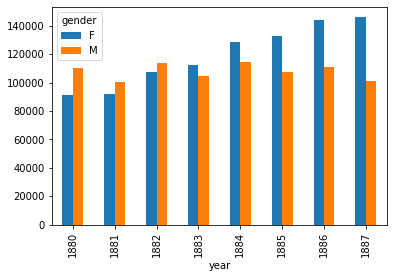

In [46]:
total_births.plot(kind='bar')
plt.show()

In [47]:
allData.groupby(['year', 'gender']).sum().unstack('gender').head()

birthcount        
gender          F       M
year                     
1880        90993  110493
1881        91955  100748
1882       107851  113687
1883       112322  104632
1884       129021  114445

In [48]:
def add_prop(group):
    births = group.birthcount.astype(float)
    group['prop'] = births/births.sum()
    return group

names = allData.groupby(['year', 'gender']).apply(add_prop)
names.head()

,name,gender,birthcount,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
